In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
X = pd.read_csv('Student status train.csv', index_col = "id")
y = X.pop("Target")
X_copy = X.copy()
y_copy = y.copy()

In [30]:
from sklearn.model_selection import train_test_split
X, X_valid, y, y_valid = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
cirr_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
             'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
             'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
             ]
X_cirr = X[cirr_cols]
X_cirr_valid = X_valid[cirr_cols]
X.drop(cirr_cols, axis = 1, inplace = True)
X_valid.drop(cirr_cols, axis = 1, inplace = True)

In [37]:
from sklearn.preprocessing import LabelEncoder
target = LabelEncoder()
y = target.fit_transform(y)
y_valid = target.transform(y_valid)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi

array([0.01013545, 0.08298954, 0.01419776, 0.11433707, 0.01090424,
       0.03684236, 0.09163274, 0.00463868, 0.03534114, 0.02880773,
       0.02705245, 0.0241332 , 0.1086013 , 0.01460763, 0.        ,
       0.03271355, 0.11129569, 0.05468968, 0.09323665, 0.09614619,
       0.        , 0.01232907, 0.00777231, 0.0160276 ])

<BarContainer object of 24 artists>

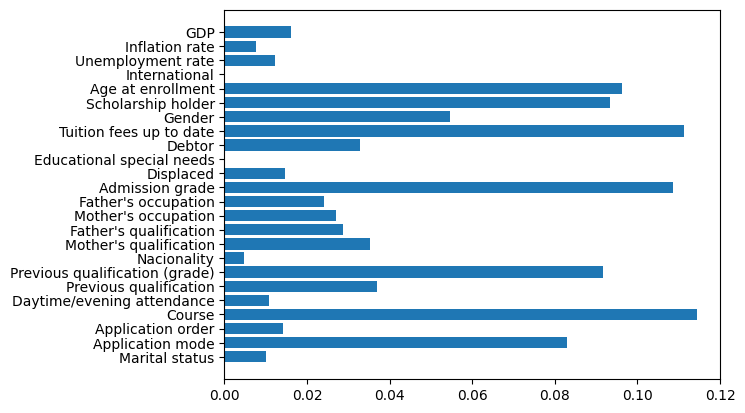

In [39]:
feature_names = X.columns
plt.barh(feature_names, mi)

<BarContainer object of 12 artists>

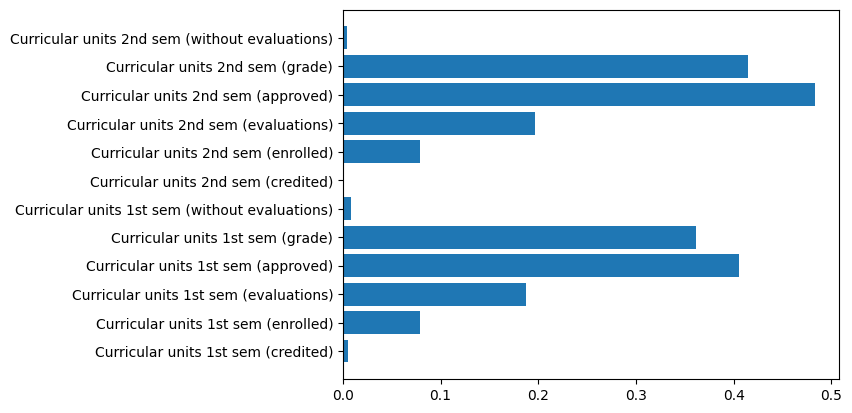

In [40]:
mi_cirr = mutual_info_classif(X_cirr, y)
feature_names_cirr = X_cirr.columns
plt.barh(feature_names_cirr, mi_cirr)

In [63]:
imp_cols = [feature for feature, score in zip(feature_names, mi) if score > 0.06]
imp_cirr_cols = [feature for feature, score in zip(feature_names_cirr, mi_cirr) if score > 0.3]

In [82]:
X_first_try = pd.concat([X[imp_cols], X_cirr[imp_cirr_cols]], axis = 1)
X_first_try_valid = pd.concat([X_valid[imp_cols], X_cirr_valid[imp_cirr_cols]], axis = 1)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators = 969, random_state = 69)
model.fit(X_first_try, y)
y_pred = model.predict(X_first_try_valid)
accuracy_score(y_valid, y_pred)

0.8090695243073707

In [85]:
X_test = pd.read_csv('Student status test.csv', index_col = "id")

X_test_first_try = pd.concat([X_test[imp_cols], X_test[imp_cirr_cols]], axis = 1)

preds = model.predict(X_test_first_try)

In [89]:
preds_original = target.inverse_transform(preds)
preds_original

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [90]:
output = pd.DataFrame({'id': X_test.index, 'Target': preds_original})
output.to_csv('submission.csv', index=False)

array([0, 2, 2, 2])